## Lab4 CCD

### Part 1: Gain and Read Noise

#### Part 1.1: Gain

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np

In [2]:
# Import the bias data
bias0 = []
for i in range(1,11):
    bias0.append(fits.getdata("/Users/zhangyuchen/Desktop/BB-4/BiasData/" +"Bias-"+ '0'*(4-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))
# I have changed the address to the one on my own computer    
# "/Users/elinazyc/Desktop/biasData/" +"Bias-"+ '0'*(4-len(str(i)))+str(i)+'bias.fit', ext=0).astype(np.int))

In [3]:
# average the bias
avbias0 = np.asarray(bias0).mean(axis = 0)

In [4]:
# Import the flat data at three different light levels
f100 = []
for i in range(1,11):
    f100.append(fits.getdata("/Users/zhangyuchen/Desktop/BB-4/FlatData/" +"Flat100-" + '0'*(4-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))
    
f119 = []
for i in range(1,11):
    f119.append(fits.getdata("/Users/zhangyuchen/Desktop/BB-4/FlatData/" +"Flat119-" + '0'*(4-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))
    
f140 = []
for i in range(1,11):
    f140.append(fits.getdata("/Users/zhangyuchen/Desktop/BB-4/FlatData/" +"Flat140-" + '0'*(4-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))


In [5]:
# substract the averaged bias from each flat-field image
flat100 = f100 - avbias0
flat119 = f119 - avbias0
flat140 = f140 - avbias0

In [6]:
# calculate the mean of each light level

mean100 = np.asarray(flat100).mean()
mean119 = np.asarray(flat119).mean()
mean140 = np.asarray(flat140).mean()

mean = [mean100, mean119, mean140] # save them as an array

In [7]:
# calculate the variance for each pixel in the corrected flat frames
# then calculate the mean of the variance

var100 = np.asarray(flat100).var(axis=0)
mean_var100 = np.asarray(var100).mean()

var119 = np.asarray(flat119).var(axis=0)
mean_var119 = np.asarray(var119).mean()

var140 = np.asarray(flat140).var(axis=0)
mean_var140 = np.asarray(var140).mean()

mean_var = [mean_var100, mean_var119, mean_var140]  # save them as an array

a=0.6016470408310627, b=-3434.9153875035354


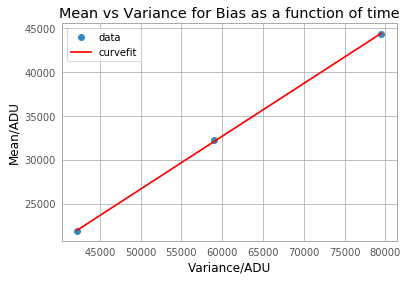

In [8]:
# curvefit 
from scipy.optimize import curve_fit

# suppose a linear relationship
def func(x,a,b):
    return a*np.asarray(x)+b 

# manually fit the curve to obtain a viable set of starting parameters
at, bt = (0.5, -5000) 
coeff, fit_err = curve_fit(func, mean_var, mean, p0=(at,bt))

# plot the results
print ("a=%s, b=%s" % (coeff[0], coeff[1]))

plt.plot(mean_var, mean, 'o', label='data')
plt.plot(mean_var, func(mean_var, *coeff),'-r', label='curvefit')
plt.legend()
plt.title("Mean vs Variance for Bias as a function of time")
plt.xlabel("Variance/ADU")
plt.ylabel("Mean/ADU")
plt.show()

In [9]:
gain = coeff[0]
print ("gain = %s" % coeff[0]+" electrons/ADU")

gain = 0.6016470408310627 electrons/ADU


#### Part 1.2: Read Noise

In [10]:
bias1 = [] # Another bias frame for the read-noise
for i in range(1,11):
    bias1.append(fits.getdata("/Users/zhangyuchen/Desktop/BB4_Darks/BiasData2/" +"Bias2-"+ '0'*(4-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))

In [11]:
# substract the two bias frames
sub_bias = []
for i in range(0,10):
    sub_bias.append(bias0[i] - bias1[i])

# Find the standard deviation of the bias difference frame
std_sub_bias = np.std(sub_bias)

# The std about the mean for the difference frame will be sqrt(2) times the read noise
RNc = std_sub_bias/np.sqrt(2)
RNe = RNc * gain # times the gain to get read noise in terms of electrons
RNe

12.686658291080038

In [12]:
# find the y intercept of the Mean vs Variance graph in part 1.1
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(mean, mean_var)
RNc = np.sqrt(intercept) # The y intercept is the read noise squared in ADU since the mean is zero
RNe = RNc * gain # multiply the gain to get the read noise in electrons
RNe

45.47781970413789

### Part 2: Dark Current

In [13]:
# Import the bias data
bias2 = []
for i in range(1,51):
    bias2.append(fits.getdata("/Users/zhangyuchen/Desktop/BB4_Darks/BiasData2/" +"Bias2-"+ '0'*(4-len(str(i)))+str(i)+'.fit', ext=0).astype(np.int))

In [14]:
# average the bias
avbias2 = np.asarray(bias2).mean(axis=0)

In [15]:
# Import the dark data
dark7_400 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "GroupBBDarkT7Exp400.fit".format(i),ext=0).astype(np.int)
dark8_400 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "GroupBBDarkT8Exp400.fit".format(i),ext=0).astype(np.int)

dark6_600 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "DarkT6exp600-0001.fit".format(i),ext=0).astype(np.int)
dark9_600_1 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "DarkT9exp600-0001.fit".format(i),ext=0).astype(np.int)

dark6_900 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "GroupAADark_Day_2_6cexp900-0001.fit".format(i),ext=0).astype(np.int)
dark9_300 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "GroupAADark_Day_2_9cexp300-0001.fit".format(i),ext=0).astype(np.int)

dark46_450 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "GroupADarkT4.6Exp450.fit".format(i),ext=0).astype(np.int)
dark89_300 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "GroupADarkT8.9Exp300.fit".format(i),ext=0).astype(np.int)


dark6_300 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "GroupBDarkT6Exp300.fit".format(i),ext=0).astype(np.int)
dark9_600_2 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "GroupBDarkT9Exp600.fit".format(i),ext=0).astype(np.int)

dark71_400 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "GroupCDarkT7.1Exp400.fit".format(i),ext=0).astype(np.int)
dark94_300_1 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "GroupCDarkT9.4Exp300.fit".format(i),ext=0).astype(np.int)

dark7_600 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "GroupDDarkT7Exp600.fit".format(i),ext=0).astype(np.int)
dark94_300_2 = fits.getdata("/Users/zhangyuchen/Desktop/361_Dark/" + "GroupDDarkT9.4Exp300.fit".format(i),ext=0).astype(np.int)


In [16]:
# substract the bias frame and devide the exposure time
dark7_400 = (dark7_400 - avbias2)/400.0 # exp is 400 sec
dark8_400 = (dark8_400 - avbias2)/400.0 # exp is 400

dark6_600 = (dark6_600 - avbias2)/600.0 # exp is 600 sec
dark9_600_1 = (dark9_600_1 - avbias2)/600.0

dark6_900 = (dark6_900 - avbias2)/900.0
dark9_300 = (dark9_300 - avbias2)/300.0

dark46_450 = (dark46_450 - avbias2)/450.0
dark89_300 = (dark89_300 - avbias2)/300.0

dark6_300 = (dark6_300 - avbias2)/300.0
dark9_600_2 = (dark9_600_2 - avbias2)/600.0

dark71_400 = (dark71_400 - avbias2)/400.0
dark94_300_1 = (dark94_300_1 - avbias2)/300.0

dark7_600 = (dark7_600 - avbias2)/600.0
dark94_300_2 = (dark94_300_2 - avbias2)/300.0


In [17]:
# compute the mean of a particular temperature

# average 7C with different exp time and 7.1C
av_dark7 = (np.asarray(dark7_400).mean()+np.asarray(dark7_600).mean()+np.asarray(dark71_400).mean())/3

av_dark8 = np.asarray(dark8_400).mean()

# average 8C with different exp time
av_dark6 = (np.asarray(dark6_600).mean()+np.asarray(dark6_900).mean()+np.asarray(dark6_300).mean())/3

# average 8.9C and 9C with different exp time
av_dark9 = (np.asarray(dark9_600_1).mean()+np.asarray(dark9_600_2).mean()+np.asarray(dark9_300).mean()+np.asarray(dark89_300).mean())/4

#average  9.4C with different exp time
av_dark94 = (np.asarray(dark94_300_1).mean()+np.asarray(dark94_300_2).mean())/2

av_dark46 = np.asarray(dark46_450).mean()

Text(0, 0.5, 'Mean count level per second (ADU/sec)')

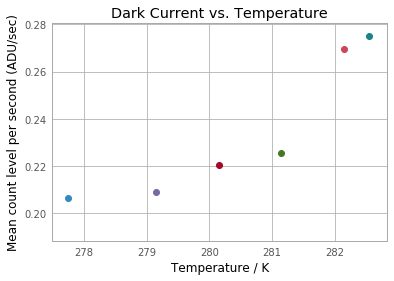

In [18]:
# plot
plt.scatter(277.75, av_dark46) # 4.6 celsius is 277.75K
plt.scatter(279.15, av_dark6) # 6 celsius is 279.15K
plt.scatter(280.15, av_dark7) # 7 celsius is 280.15K
plt.scatter(281.15, av_dark8) # 8 celsius is 281.15K
plt.scatter(282.15, av_dark9) # 9 celsius is 282.15K
plt.scatter(282.55, av_dark94) # 9.4 celsius is 282.55K

plt.title("Dark Current vs. Temperature")
plt.xlabel("Temperature / K")
plt.ylabel("Mean count level per second (ADU/sec)")

In [19]:
# save the averaged dark and temperature as two arrays
av_dark = [av_dark46, av_dark6, av_dark7, av_dark8, av_dark9, av_dark94]
temp= [277.75, 279.15, 280.15, 281.15, 282.15, 282.55]

/Users/zhangyuchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys


a=1753.4454636315056, b=0.8404673633175882


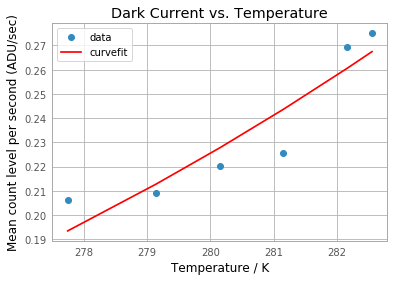

In [20]:
# curvefit 
from scipy.optimize import curve_fit

# based on the dark formula, guess a function
# a is A and b is bandgap
def func2(x,a,b):
    return a*np.asarray(x)**(1.5)*np.exp(-b/(2*(8.62*10**(-5))*np.asarray(x)))

# manually fit the curve to obtain a viable set of starting parameters
at,bt = (1000,1.1)

# execute the curve fit
coeffs, fiterr = curve_fit(func2, temp, av_dark, p0=(at,bt))

# plot the results
print ("a=%s, b=%s" % (coeffs[0], coeffs[1]))
plt.plot(temp,av_dark, 'o', label='data')
plt.plot(temp,func2(temp,*coeffs),'-r', label='curvefit')
plt.title("Dark Current vs. Temperature")
plt.xlabel("Temperature / K")
plt.ylabel("Mean count level per second (ADU/sec)")
plt.legend()
plt.show()

In [21]:
print ("The bandgap energy Eg = %s " %  coeffs[1])

The bandgap energy Eg = 0.8404673633175882 
